# Introduction
**Quantitative data** is information that can be measured in real numbers. Examples include,
* Height of a person
* Speed of Tesla cars
* Runs scored by a batsman
* Wickets taken by a bowler

In this notebook, we'll explore various statistical concepts involved in **summarizing quantitative data** with the help of **Indian Premier League (IPL)** dataset.

The data consists of two CSV files for all IPL matches played from  **2008 - 2018** (11 seasons)
* **`matches.csv`** - match-by-match data
* **`deliveries.csv`** - ball-by-ball data

Let's setup `pandas` dataframes for the above files and import necessary libraries.

In [0]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import os

matches    = pd.read_csv('../input/matches.csv')
deliveries = pd.read_csv('../input/deliveries.csv')

Let's inspect the `matches` data before stepping into the concepts

In [0]:
print(f'Number of rows    = {len(matches)}')
print(f'Number of columns = {len(matches.columns)}')
matches.head()

# Measuring center

First step often learnt in [descriptive statistics](https://en.wikipedia.org/wiki/Descriptive_statistics) is to measure the center of given data. There are various ways to measure the center. We'll go through some of them.

Let's get the data ready for our experiments. 
* **`win_by_runs`** columns represents the margin in which a team has won against the opponent, if the team batting first has won.
* i.e. If **`team1`** scores **200** runs and **`team2`** scores **150** runs, **`team1`** won the match by **50 runs** - If **`team1`** bats first

Hence, we have to exclude all instances of **`win_by_wickets`** cases, i.e. **`win_by_runs = 0`**

In [0]:
win_by_runs_data = matches[matches['win_by_runs'] > 0].win_by_runs
print(f'Number of rows = {len(win_by_runs_data)}')
win_by_runs_data.head()

We'll discuss about 3 methods of measuring center - ***Mean***, ***Median*** and ***Mode***

## Mean

**Mean** (usuallly refered to **Arithmetic Mean**, also called **Average**) is calculated as **sum** of all numbers in the dataset and dividing by the **total** number of values

### Arithmetic Mean

\begin{align}
Arithmetic\,mean = {Sum\,of\,all\,numbers \over No.\,of\,values\,in\,the \,set}\,\,\,\,or\, 
\end{align}

\begin{align}
\bar{x} = {\sum_{i=i}^{n} x_{i} \over n}
\end{align}

Arithmetic mean of our data is calculated as,

`mean = (35 + 15 + 97 + 17 + ...) / 315`

Let's do that in code.

In [0]:
win_by_runs_rows = len(win_by_runs_data) # No. of values in the set (n)
win_by_runs_sum = sum(win_by_runs_data) # Sum of all numbers

print(f'Sum of all numbers = {win_by_runs_sum}, No. of values in the set = {win_by_runs_rows}')

win_by_runs_arithmetic_mean = win_by_runs_sum / win_by_runs_rows # Calculating arithmetic mean
print(f'Arithmetic mean = {win_by_runs_arithmetic_mean}')

Sum of all numbers = 9377, No. of values in the set = 315
Arithmetic mean = 29.76825396825397


We can verify the number with the help of `mean()` method in `pandas`

In [0]:
win_by_runs_arithmetic_mean_verify = win_by_runs_data.mean()
print(f'Arithmetic mean (verify) = {win_by_runs_arithmetic_mean_verify}')

### Geometric Mean

Another type of mean is **geometric mean**. It is calculated as **Nth root** of **product** of all the numbers, where N is the total number of values in the dataset

\begin{align}
Geometric\,mean = \sqrt[n]{product\,of\,all\,numbers}
\end{align}

\begin{align}
\bar{x}_{geom} = \sqrt[n]{\prod_{i=1}^n x_i}
\end{align}

Geometric mean of our data is calculated as,

`geometric_mean = 315thRoot(35 x 15 x 97 x 17 x ...)`

In [0]:
win_by_runs_geo_mean = stats.mstats.gmean(win_by_runs_data)
print(f'Geometric mean = {win_by_runs_geo_mean}')

## Meadian

**Median** is the middle value, when the data is sorted in ascending order. Half of the data points are smaller and half of data points are larger than the median.

For example purpose, let's take first 10 entries of the data.

In [0]:
win_by_runs_10 = list(win_by_runs_data[:10])
print(win_by_runs_10)
print(sorted(win_by_runs_10))

To find median,
* Sort the data from smallest to largest (ascending order)
* If there are **odd** number of data points, median is the *middle* data point.
* If there are **even** number of data points, median is the *average of two* middle data points

```
[5, 14, 15, 15, 17, 21, 27, 35, 51, 97]
                ^^  ^^  
           (middle numbers)
                                  
Median = (17 + 21)/2 = 19
```

Let's verify,

In [0]:
win_by_runs_10_median = win_by_runs_data[:10].median()
print(f'Median (first 10) = {win_by_runs_10_median}')

win_by_runs_median = win_by_runs_data.median()
print(f'Median = {win_by_runs_median}')

## Mode

**Mode** is the number occurring most often in the dataset.
* It is only meaningful if we have many repeated values in our dataset
* If no value is repeated, there is **no mode**
* A dataset can have ***one mode***, ***multiple modes*** or ***no mode***.

Let's try to retrieve mode for our dataset.

In [0]:
# Retrieve frequency (sorted, descending order)
win_by_runs_data.value_counts(sort=True, ascending=False).head()

As we can observe, `[4, 14]` occurs **11 times** in the dataset. 

Hence, **Mode = [4, 14]**,

We can verify using `pandas.DataFrame.mode` method

In [0]:
win_by_runs_data_mode = win_by_runs_data.mode()
print(f'Mode = {list(win_by_runs_data_mode)}')

# Measuring spread (variability)

By just measuring the center of the data, one wouldn't get much idea about the dataset. There are various ways of measuring how the data is spread.

## Range

**Range** is the simplest form of measuring variability. It is the difference between largest number and smallest number.

In [0]:
win_by_runs_max = win_by_runs_data.max()
win_by_runs_min = win_by_runs_data.min()
win_by_runs_range = win_by_runs_max - win_by_runs_min

print(f'Largest = {win_by_runs_max}, Smallest = {win_by_runs_min}, Range = {win_by_runs_range}')

## Interquartile Range (IQR)

**Interquartile range** or **IQR** is the amount spread in middle 50% of the dataset or the distance between *first Quartile* (Q₁) and *third Quartile* (Q₃)

* First Quartile (Q₁) = Median of data points to left of the median in ordered list (25th percentile)
* Second Quartile (Q₂) = Median of data (50th percentile)
* Third Quartile (Q₃) = Median of data points to right of the median in ordered list (75th percentile)
* IQR = Q₃ - Q₁

![Interquartile range](https://nowke.github.io/stats/images/iqr.svg)

```
[41, 48, 58, 60, 60, 67, 69, 71, 75, 78, 81, 83, 89, 89, 91, 92, 94, 94, 96, 98]
 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
             first half                              second half
        median = (60 + 67) / 2 = 63.5        median = (91 + 92) / 2 = 91.5

Q₁ = 63.5
Q₃ = 91.5
IQR = Q₃ - Q₁ = 91.5 - 63.5 = 28
```

Let's calculate IQR for `win_by_runs`

In [0]:
win_by_runs_25_perc = stats.scoreatpercentile(win_by_runs_data, 25)
win_by_runs_75_perc = stats.scoreatpercentile(win_by_runs_data, 75)

win_by_runs_iqr = stats.iqr(win_by_runs_data)
print(f'Q1 (25th percentile) = {win_by_runs_25_perc}')
print(f'Q3 (75th percentile) = {win_by_runs_75_perc}')
print(f'IQR = Q3 - Q1 = {win_by_runs_75_perc} - {win_by_runs_25_perc} = {win_by_runs_iqr}')

### Percentiles

**Percentile** is a number where certain percentage of numbers fall below that number.

Taking the above example,
* 25th percentile = 11 &rarr; 25% of the matches are won by less thant 11 runs.
* 75th percentile = 38 &rarr; 75% of the matches are won by less than 38 runs.

Percentile can be calculated using `scipy.stats.scoreatpercentile`

To calculate 95th percentile,

In [0]:
win_by_runs_95_perc = stats.scoreatpercentile(win_by_runs_data, 95)
print(f'95th percentile = {win_by_runs_95_perc}')

## Variance and Standard deviation

Standard deviation and variance measures the spread of a dataset. If the data is spread out largely, standard deviation (and variance) is greater. 

In other terms, 
* if more data points are closer to the mean, standard deviation is less
* if the data points are further from the mean, standard deviation is more

Formula for variance for **population** is given as,

\begin{align}
Variance\,=\sigma^2 = {\sum_{i=i}^{n}{(x_i - \mu)}^2 \over n}
\end{align}

where, $\mu$ is the **mean** of the dataset

Standard deviation is just the square root of variance

\begin{align}
Standard\,deviation\,=\sigma = \sqrt{\sum_{i=i}^{n}{(x_i - \mu)}^2 \over n}
\end{align}

> **Note**:
>
> For **Sample**, we use `n - 1` instead of `n`,  $\bar{x}$ - mean of sample
> \begin{align}
Standard\,deviation\,=S_{sample} = \sqrt{\sum_{i=i}^{n}{(x_i - \bar{x})}^2 \over n - 1}
\end{align}

Let's take `win_by_wickets` dataset.

In [0]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
print(f'Number of rows = {len(win_by_wickets_data)}')
win_by_wickets_data.head()

Number of rows = 371


1     7
2    10
3     6
5     9
6     4
Name: win_by_wickets, dtype: int64

Let's calculate the standard deviation by formula

In [0]:
# Step 1: calculate mean(μ)
win_by_wickets_mean = win_by_wickets_data.mean()
print(f'Mean = {win_by_wickets_mean}')

# Step 2: calculate numerator part - sum of (x - mean)
win_by_wickets_var_numerator = sum([(x - win_by_wickets_mean) ** 2 for x in win_by_wickets_data])

# Step 3: calculate variane
win_by_wickets_variance = win_by_wickets_var_numerator / len(win_by_wickets_data)
print(f'Variance = {win_by_wickets_variance}')

# Step 4: calculate standard deviation
win_by_wickets_standard_deviation = math.sqrt(win_by_wickets_variance)
print(f'Standard deviation = {win_by_wickets_standard_deviation}')

Mean = 6.283018867924528
Variance = 3.3673396734984533
Standard deviation = 1.835031245918841


Let's verify the result using `pandas.DataFrame.std` (Note: We're passing `ddof = 0` for population)

In [0]:
win_by_wickets_standard_deviation_verify = win_by_wickets_data.std(ddof = 0)
print(f'Standard deviation = {win_by_wickets_standard_deviation_verify}')

Standard deviation = 1.835031245918841


i.e. matches are won by an average of 6.28 wickets with standard deviation of 1.83 (spread = 6.28 $\pm$ 1.83)

### Comparison with IQR

IQR is calculated with respect to **median**, Standard deviation is calculated with respect to **mean**.

Let's compare those for `win_by_runs` data

In [0]:
win_by_runs_std = win_by_runs_data.std(ddof = 0)
print(f'| Mean               = {win_by_runs_arithmetic_mean} | Median  = {win_by_runs_median} |')
print(f'| Standard deviation = {win_by_runs_std} | IQR     = {win_by_runs_iqr} |')

| Mean               = 29.76825396825397 | Median  = 22.0 |
| Standard deviation = 27.28719000229254 | IQR     = 27.0 |


For this particular data, standard deviation and IQR are pretty close by, although it won't be the scenario always.

## Distribution graph

Let's plot the frequency distribution graph for `win_by_wickets` data since we can have values from 1 - 10.

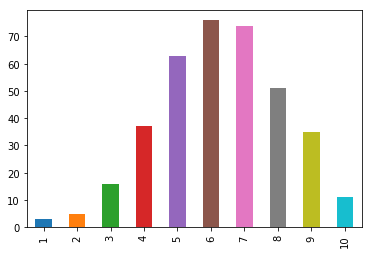

In [0]:
win_by_wickets_dist = win_by_wickets_data.value_counts(sort=False)
win_by_wickets_dist.plot.bar()